# Question 1

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

 > ### *freqColor*
 >> The *freqColor* function gives the maximum occuring color in the given image
 > ### *mergeImage*
 >> The *mergeImage* function takes two image (background and foreground) as input. The object is extracted from the foreground image. Every pixel which does not have the color same as that of the most frequently occuring color is considered to be part of the object
 >>> For better results the cosine similarity between the pixel color and the most frequently occuring color was used. The color which has cosine similarity less than some threshold is taken to be part of the object

In [2]:
def freqColor(img):
    img = img.reshape((-1,img.shape[-1]))
    colors, counts = np.unique(img, return_counts=True, axis=0)
    return colors[counts.argmax()]

In [3]:
def mergeImage(fg, bg):
    fg = fg.astype('int32')
    bg = bg.astype('int32')
    maxColor = freqColor(fg)
    
    #making dot product array with most frequent color
    fg_norm = np.linalg.norm(fg, axis = 2)
    ind_val = np.matmul(fg,maxColor)/np.linalg.norm(maxColor)
    ind_val[np.where(fg_norm > 0)] = ind_val[np.where(fg_norm > 0)]/fg_norm[np.where(fg_norm > 0)]
    
    res = np.empty(bg.shape)
    threshold = 0.91

    #putting object on background based on cosine similarity
    res[np.where(ind_val < threshold)] = fg[np.where(ind_val < threshold)]
    res[np.where(ind_val >= threshold)] = bg[np.where(ind_val >= threshold)]
    
    
    res = res.astype('uint8')
    
    return res

In [4]:
def plotImages(foreground, background, result):
    _,images = plt.subplots(1,2, figsize = (20,20))
    images[0].imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB))
    images[0].set_title('background')
    images[1].imshow(cv.cvtColor(foreground,cv.COLOR_BGR2RGB))
    images[1].set_title('foreground')

    _,output = plt.subplots(1,1, figsize = (20,20))
    output.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))
    output.set_title('output')
    plt.show()
    

In [5]:
f = cv.imread('./images/fg.jpg',cv.IMREAD_UNCHANGED)
b = cv.imread('./images/bg.jpg',cv.IMREAD_UNCHANGED)

In [6]:
out = mergeImage(f,b)

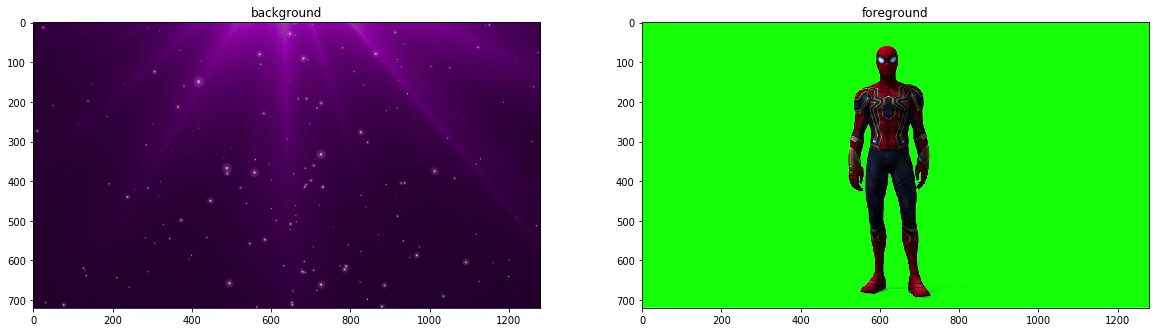

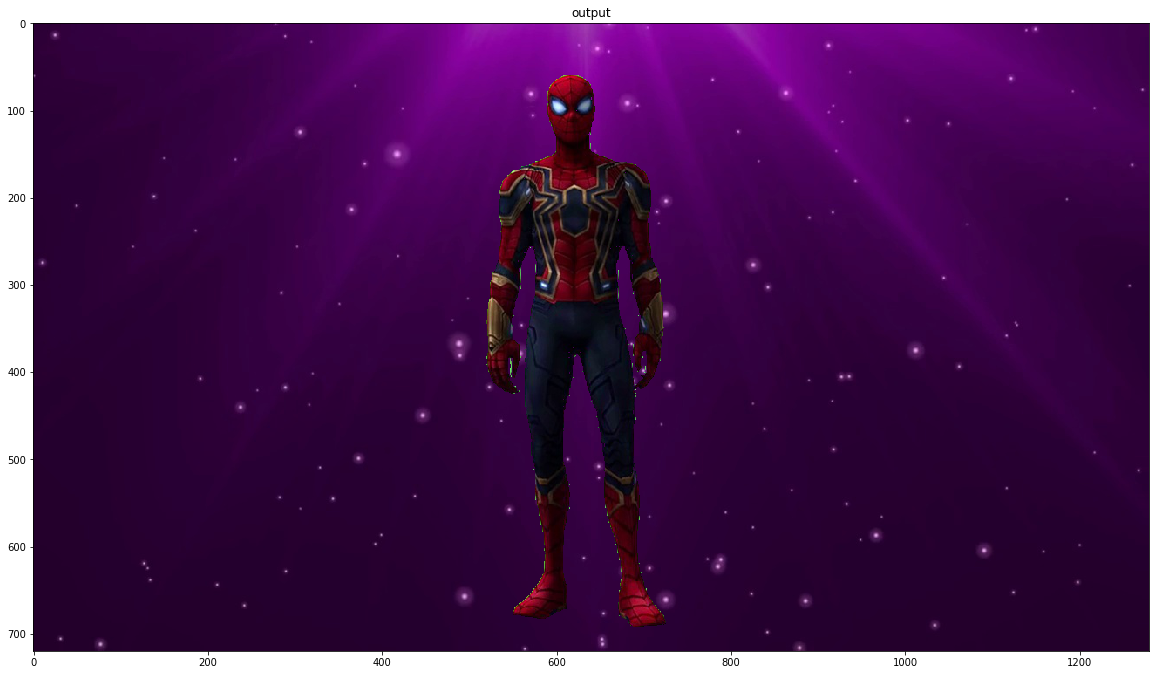

In [7]:
plotImages(f,b,out)

In [8]:
f = cv.imread('./images/fg2.jpg',cv.IMREAD_UNCHANGED)
b = cv.imread('./images/bg2.png',cv.IMREAD_UNCHANGED)

In [9]:
out = mergeImage(f,b)

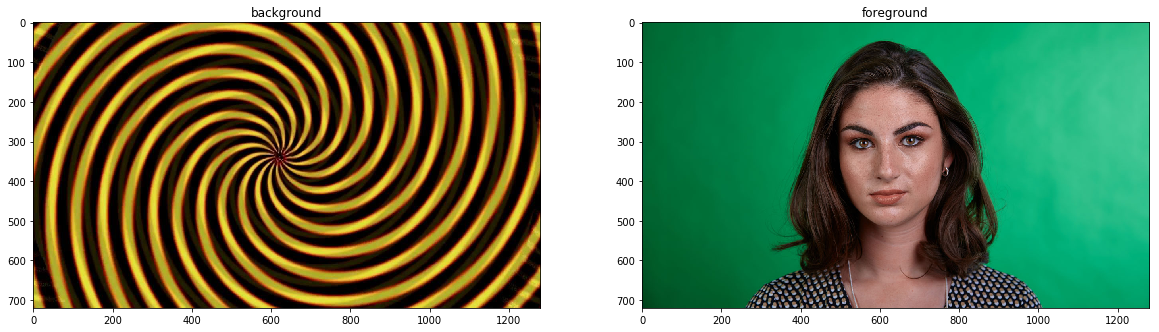

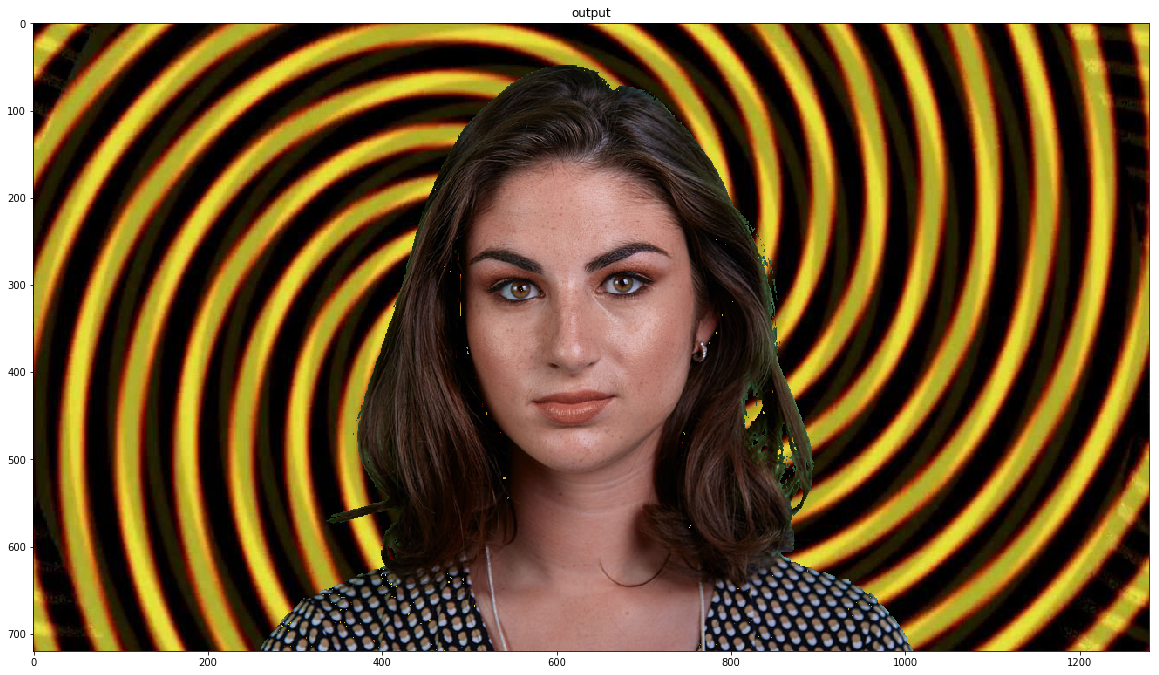

In [10]:
plotImages(f,b,out)

In [11]:
f = cv.imread('./images/fg3.jpg',cv.IMREAD_UNCHANGED)
b = cv.imread('./images/bg3.jpg',cv.IMREAD_UNCHANGED)

In [12]:
out = mergeImage(f,b)

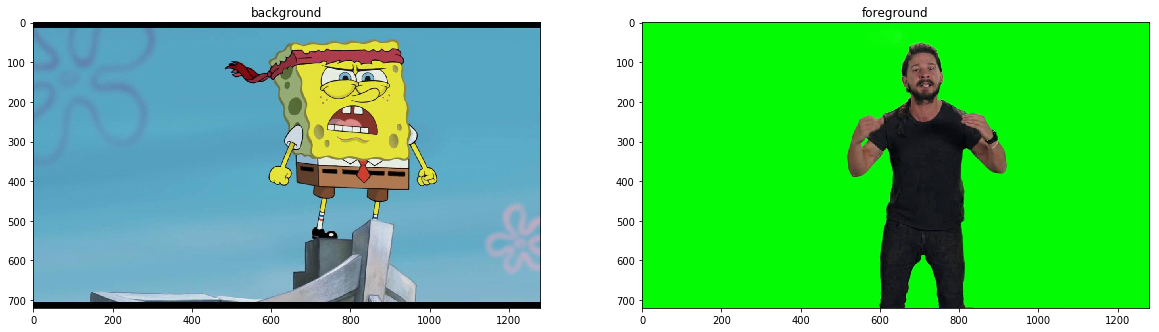

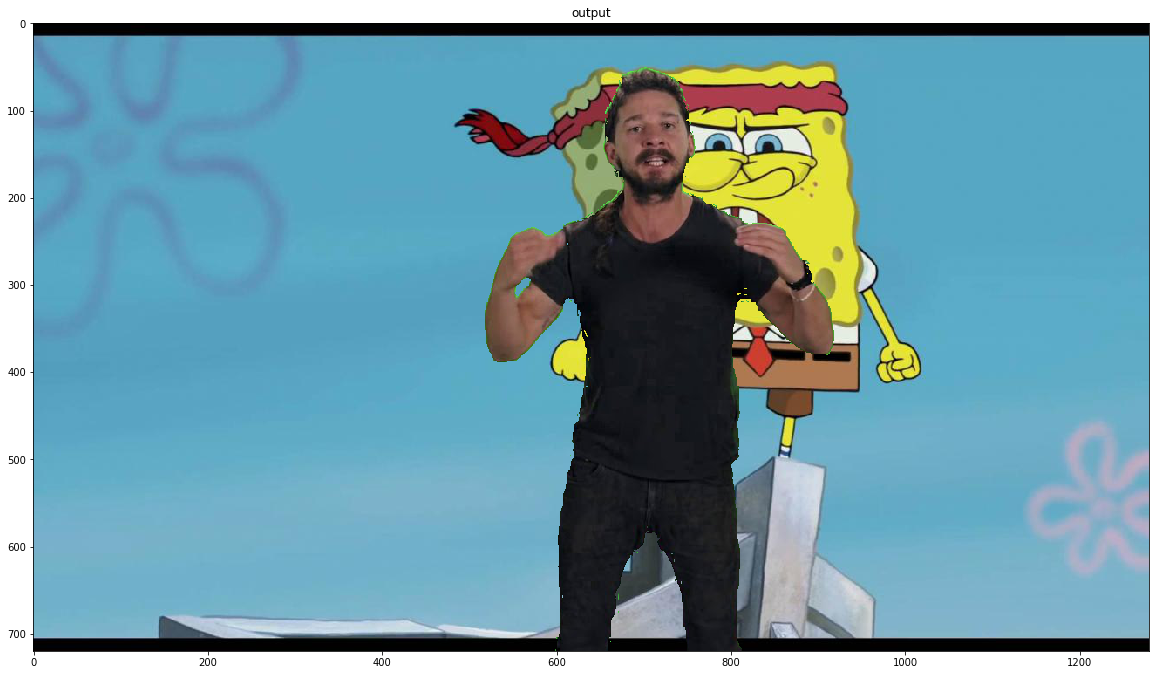

In [13]:
plotImages(f,b,out)